<H1>Viral Data Analysis</H1>
<p>Date: 2021 10 08</p>
<p>Author: Anonymous course participant</p>

<p>3 Questions to answer:</p>
<ul>
<il>1. Which month most people were vaccinated in Lithuania?</il>
<br>
<il>2. Is there correlation between new covid-19 cases in USA and Bitcoin price?</il>
<br>
<il>3. Is it possible to predict S&P500 index using new covid-19 cases and new vaccinated people count in USA or world?</il>
<br>
</ul>

<p>Main dataset:</p>
<p>https://covid.ourworldindata.org/data/owid-covid-data.csv</p>

<p>Additional datasets:</p>
<p>BTC: https://finance.yahoo.com/quote/BTC-USD/history</p>
<p>S&P500: https://www.marketwatch.com/investing/index/spx</p>


<H2>Data loading and preparation</H2>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df_raw = pd.read_csv('owid-covid-data.csv')
df_raw.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
df_raw.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

<H2>1. Which month most people were vaccinated in Lithuania?</H2>

Most people were vaccinated on 2021/6, total vaccinations: 632106


<AxesSubplot:xlabel='date'>

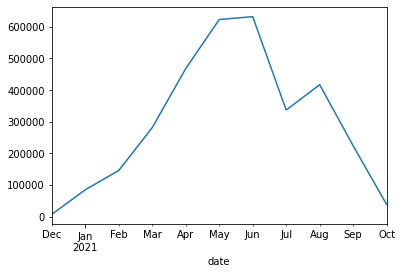

In [4]:
filtr = df_raw['location'] == "Lithuania"
df_selected = df_raw.loc[filtr, ['date', 'new_vaccinations']]
df_selected['date'] = pd.to_datetime(df_selected['date'])
df_selected.dropna(inplace=True)
df_selected.set_index('date', inplace=True)
df_selected = df_selected.resample('M').new_vaccinations.sum()

print(f"Most people were vaccinated on {df_selected.idxmax().year}/{df_selected.idxmax().month}, total vaccinations: {int(df_selected.max())}")
df_selected.plot()

<b>Answer: Most people were vaccinated on 2021/6, total vaccinations: 632106</b>

<H2>2. Is there correlation between new covid-19 cases in USA and Bitcoin price?</H2>

In [5]:
filtr_usa = df_raw['location'] == "United States"
df_usa = df_raw.loc[filtr_usa, ['date', 'new_cases']]
df_usa['date'] = pd.to_datetime(df_usa['date'])
df_usa.dropna(inplace=True)
df_usa.set_index('date', inplace=True)
df_usa.head()

,new_cases
date,
2020-01-23,0.0
2020-01-24,1.0
2020-01-25,0.0
2020-01-26,3.0
2020-01-27,0.0


In [6]:
df_btc = pd.read_csv('BTC-USD.csv')
df_btc = df_btc[['Date', 'Close']]
df_btc.columns = ['date', 'price']
df_btc['date'] = pd.to_datetime(df_btc['date'])
df_btc.set_index('date', inplace=True)
df_btc.head()

,price
date,
2019-12-01,7424.292480
2019-12-02,7321.988281
2019-12-03,7320.145508
2019-12-04,7252.034668
2019-12-05,7448.307617


,new_cases,price
new_cases,1.000000,0.277714
price,0.277714,1.000000


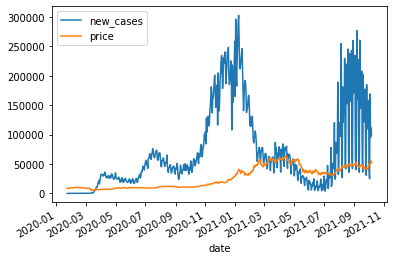

In [7]:
df_cor = pd.concat([df_usa, df_btc], axis=1, join='outer')

df_cor.dropna(inplace=True)
df_cor.tail()
df_cor.plot()
df_cor.corr().style.background_gradient(cmap='coolwarm')

<b>Answer: There is a correlation between Bitcoin price and total cases in USA, but it's very small, only 0.27</b>

<H2>3. Is it possible to predict S&P500 index using new covid-19 cases and new vaccinated people count in USA or world?</H2>

In [8]:
df_sp500 = pd.read_csv('sp500.csv')
df_sp500.columns = df_sp500.columns.str.lower()
df_sp500.rename({"close": "price"}, inplace=True, axis=1)
df_sp500['date'] = pd.to_datetime(df_sp500['date'])
df_sp500.set_index('date', inplace=True)
df_sp500.drop(['high','low'], axis=1, inplace=True)
df_sp500.head()

,open,price
date,,
2021-10-08,"4,406.51","4,391.34"
2021-10-07,"4,383.73","4,399.76"
2021-10-06,"4,319.57","4,363.55"
2021-10-05,"4,309.87","4,345.72"
2021-10-04,"4,348.84","4,300.46"


In [9]:
df_usa1 = df_raw.loc[filtr_usa, ['date', 'new_cases', 'new_vaccinations']]
df_usa1['date'] = pd.to_datetime(df_usa1['date'])
df_usa1.dropna(inplace=True)
df_usa1.set_index('date', inplace=True)
df_usa1.head()

,new_cases,new_vaccinations
date,,
2020-12-21,191272.0,57909.0
2021-01-05,231224.0,273209.0
2021-01-06,256327.0,470328.0
2021-01-07,288658.0,612621.0
2021-01-08,303008.0,768813.0


In [10]:
select_date = '2021-01-05'
df_concat = pd.concat([df_usa1, df_sp500], axis=1, join='outer')
for column in df_concat:
    df_concat[column] = df_concat[column].apply(lambda x: x.replace(',','') if type(x) == str else x)
    df_concat[column] = pd.to_numeric(df_concat[column])

df_concat.dropna(inplace=True)
df_concat = df_concat.drop(df_concat[df_concat.index < select_date].index)

df_concat

,new_cases,new_vaccinations,open,price
date,,,,
2021-01-05,231224.0,273209.0,3698.02,3726.86
2021-01-06,256327.0,470328.0,3712.20,3748.14
2021-01-07,288658.0,612621.0,3764.71,3803.79
2021-01-08,303008.0,768813.0,3815.05,3824.68
2021-01-12,218413.0,339816.0,3801.62,3801.19
...,...,...,...,...
2021-10-01,158284.0,846871.0,4317.16,4357.04
2021-10-04,169207.0,984739.0,4348.84,4300.46
2021-10-05,95234.0,798491.0,4309.87,4345.72


,new_cases,new_vaccinations,open,price
new_cases,1.000000,-0.301327,0.088892,0.088533
new_vaccinations,-0.301327,1.000000,-0.403134,-0.395496
open,0.088892,-0.403134,1.000000,0.993169
price,0.088533,-0.395496,0.993169,1.000000


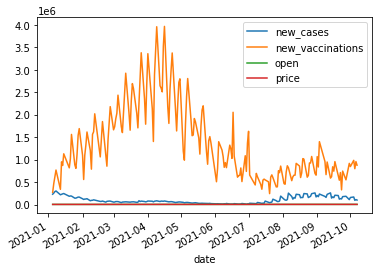

In [11]:
df_concat.plot()
df_concat.corr().style.background_gradient(cmap='coolwarm')

In [12]:
rows = df_concat.shape[0]
test_num = int(rows * 0.2)
print(f"Number of rows to use for testing: {test_num}")

Number of rows to use for testing: 36


In [13]:
df_test = df_concat.iloc[rows-test_num:rows, :]
df_train = df_concat.iloc[:rows-test_num, :]

X_train = df_train.reset_index()
y_train = X_train['price']
X_train.drop(['date', 'price'],inplace=True,axis=1)
X_train.tail()

,new_cases,new_vaccinations,open
143,255081.0,821060.0,4429.07
144,181218.0,532245.0,4437.77
145,120969.0,617769.0,4435.79
146,156039.0,654600.0,4442.18
147,141976.0,654350.0,4446.08


In [14]:
y_train.tail()

143    4436.52
144    4432.35
145    4436.75
146    4447.70
147    4460.83
Name: price, dtype: float64

In [15]:
X_test = df_test.reset_index()
y_test = X_test['price']
X_test.drop(['date', 'price'],inplace=True,axis=1)

In [16]:
def predict_using_lr(X_train, y_train, X_test, y_test):

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"MSE error: {mean_squared_error(y_test, predictions)}")
    y_predicted = pd.DataFrame(predictions,columns=['price_predicted'])
    return y_predicted


In [17]:
def plot(y_test, y_predicted):
    test_df = pd.DataFrame(y_test.to_list(), columns=['real_price'])
    ax = test_df.plot()
    y_predicted.plot(ax=ax)

<p>Predict price of S&P500 using open price, new vaccinations and new cases.</p>

MSE error: 859.7532732481295


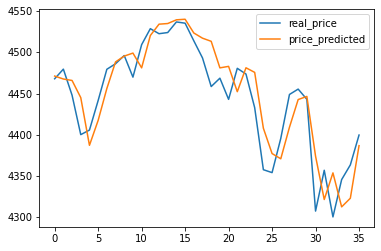

In [18]:
predicted_all = predict_using_lr(X_train, y_train, X_test, y_test)
plot(y_test, predicted_all)

<p>Predict price of S&P500 using only new vaccinations and new cases.</p>

MSE error: 217630.161225146


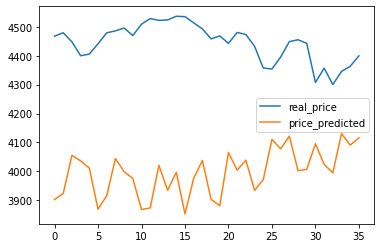

In [19]:
X_train1 = X_train[['new_cases', 'new_vaccinations']]
X_test1 = X_test[['new_cases', 'new_vaccinations']]

predicted_no_open = predict_using_lr(X_train1, y_train, X_test1, y_test)
plot(y_test, predicted_no_open)

<p>Predict price of S&P500 using only open price.</p>

MSE error: 833.1405716410128


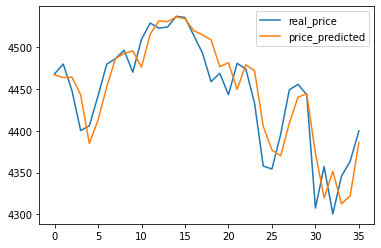

In [20]:
X_train2 = X_train[['open']]
X_test2 = X_test[['open']]

predicted_only_open = predict_using_lr(X_train2, y_train, X_test2, y_test)
plot(y_test, predicted_only_open)

In [21]:
df_world = df_raw[['date', 'new_cases', 'new_vaccinations']].copy()
df_world['date'] = pd.to_datetime(df_world['date'])
df_world = df_world.groupby(by='date').sum()
df_world.dropna(inplace=True)
df_world

,new_cases,new_vaccinations
date,,
2020-01-01,0.0,0.0
2020-01-02,0.0,0.0
2020-01-03,0.0,0.0
2020-01-04,0.0,0.0
2020-01-05,0.0,0.0
...,...,...
2021-10-03,912854.0,55484659.0
2021-10-04,1416558.0,61024656.0
2021-10-05,1309946.0,87689759.0


<AxesSubplot:xlabel='date'>

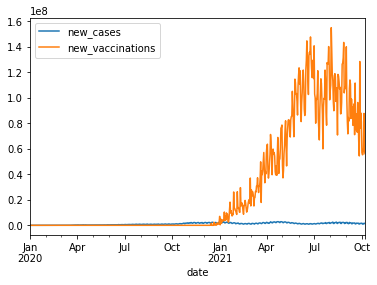

In [22]:
df_world.plot()

In [23]:
df_concat_world = pd.concat([df_world, df_sp500], axis=1, join='outer')
for column in df_concat_world:
    df_concat_world[column] = df_concat_world[column].apply(lambda x: x.replace(',','') if type(x) == str else x)
    df_concat_world[column] = pd.to_numeric(df_concat_world[column])

df_concat_world.dropna(inplace=True)
df_concat.index
df_concat_world = df_concat_world.drop(df_concat_world[~df_concat_world.index.isin(df_concat.index.tolist())].index)

df_concat_world

,new_cases,new_vaccinations,open,price
date,,,,
2021-01-05,2381867.0,4200091.0,3698.02,3726.86
2021-01-06,2516234.0,3164484.0,3712.20,3748.14
2021-01-07,2899683.0,4036518.0,3764.71,3803.79
2021-01-08,2598977.0,4558388.0,3815.05,3824.68
2021-01-12,2244740.0,4240448.0,3801.62,3801.19
...,...,...,...,...
2021-10-01,1688974.0,57008109.0,4317.16,4357.04
2021-10-04,1416558.0,61024656.0,4348.84,4300.46
2021-10-05,1309946.0,87689759.0,4309.87,4345.72


,new_cases,new_vaccinations,open,price
new_cases,1.000000,-0.049747,0.082956,0.086120
new_vaccinations,-0.049747,1.000000,0.849892,0.851040
open,0.082956,0.849892,1.000000,0.993169
price,0.086120,0.851040,0.993169,1.000000


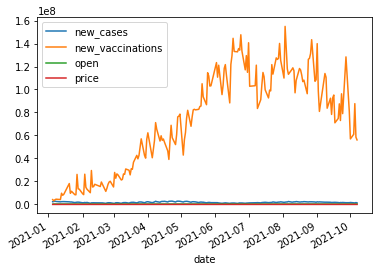

In [24]:
df_concat_world.plot()
df_concat_world.corr().style.background_gradient(cmap='coolwarm')

In [25]:
df_test_w = df_concat_world.iloc[rows-test_num:rows, :]
df_train_w = df_concat_world.iloc[:rows-test_num, :]

X_train_w = df_train_w.reset_index()
y_train_w = X_train_w['price']
X_train_w.drop(['date', 'price'],inplace=True,axis=1)
X_train_w.tail()
X_test_w = df_test_w.reset_index()
y_test_w = X_test_w['price']
X_test_w.drop(['date', 'price'],inplace=True,axis=1)
X_train_w.tail()

,new_cases,new_vaccinations,open
143,2539143.0,113209971.0,4429.07
144,2037483.0,117268469.0,4437.77
145,2018750.0,118850169.0,4435.79
146,2267943.0,116347836.0,4442.18
147,2212302.0,97101447.0,4446.08


MSE error: 813.3982543144544


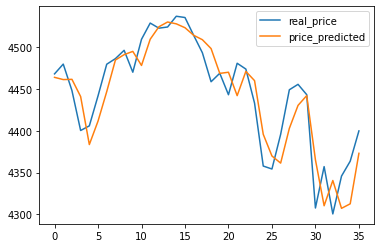

In [26]:
predicted_all_w = predict_using_lr(X_train_w, y_train_w, X_test_w, y_test_w)
plot(y_test_w, predicted_all_w)

MSE error: 51658.63837035581


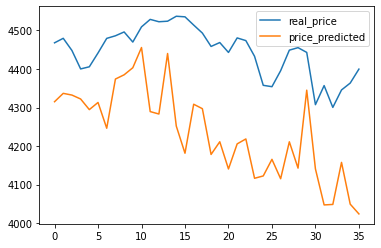

In [27]:
X_train1_w = X_train_w[['new_cases', 'new_vaccinations']]
X_test1_w = X_test_w[['new_cases', 'new_vaccinations']]

predicted_no_open_w = predict_using_lr(X_train1_w, y_train_w, X_test1_w, y_test_w)
plot(y_test_w, predicted_no_open_w)

<b>Answer: Using new cases and new vaccinations of USA to predict S&P500 price is not posiible, error is too high, and this doesn't even help to predict, because predictions only on open price got better results. But when tried to predict on world data, I got better results. Using new cases and new vaccinations of all world helped to predict S&P500. It lowered MSE error from 833 to 813, it's not much, but it helped. Also only predicting from new cases and vaccinations MSE lowered from 217630 to 51658, which great improvement. In conclusion it's not possible to predict S&P500 using only new cases and vaccinations in USA or in world with Linear regression, but using world data helps to get better prediction of S&P500.</b>